<a href="https://colab.research.google.com/github/dawnlum/dawnlum/blob/main/Analy_Commercial_Excellence_Keras_FunctionalAPI_DualTw_Model_LumChengNing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Import tensorflow libraries**
---

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.utils import plot_model

## **2. Create the model illustrated in DualTw_model.pdf (to be completed)**
---

In [4]:
def createDualTwModel():
  Lin = Input(shape=(32,32,3))
  Rin = Input(shape=(16,16,3))

  share1 = Conv2D(32,(3,3), padding='same', activation='relu')
  share2 = Conv2D(48,(3,3), padding='same', activation='relu')
  share3 = Conv2D(64,(3,3), padding='same', activation='relu')

  Lx  = Conv2D(16, (3,3), padding='same', activation='relu')(Lin)
  Lx  = Conv2D(16, (3,3), padding='same', activation='relu')(Lx)
  Lx  = MaxPooling2D(pool_size=(2,2))(Lx)
  Lx  = share1(Lx)
  Lx  = MaxPooling2D(pool_size=(2,2))(Lx)
  Lx  = share2(Lx)
  Lx  = MaxPooling2D(pool_size=(2,2))(Lx)
  Lx  = share3(Lx)
  Lx  = MaxPooling2D(pool_size=(2,2))(Lx)


  Rx  = Conv2D(16, (3,3), padding="same", activation='relu')(Rin)
  Rx  = share1(Rx)
  Rx  = MaxPooling2D(pool_size=(2,2))(Rx)
  Rx  = share2(Rx)
  Rx  = MaxPooling2D(pool_size=(2,2))(Rx)
  Rx  = share3(Rx)
  Rx  = MaxPooling2D(pool_size=(2,2))(Rx)

  x   = concatenate([Lx,Rx],axis=-1 )
  x   = Flatten()(x)
  x   = Dense(128,activation='relu')(x)
  x   = Dense(3,activation='softmax')(x)

  model = Model(inputs=[Lin,Rin], outputs=x)

  model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

  return model


modelDualTw = createDualTwModel()
modelDualTw.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 32, 32, 16)           448       ['input_1[0][0]']             
                                                                                                  
 conv2d_4 (Conv2D)           (None, 32, 32, 16)           2320      ['conv2d_3[0][0]']            
                                                                                                  
 input_2 (InputLayer)        [(None, 16, 16, 3)]          0         []                            
                                                                                              

## **3. Plot the model**
---

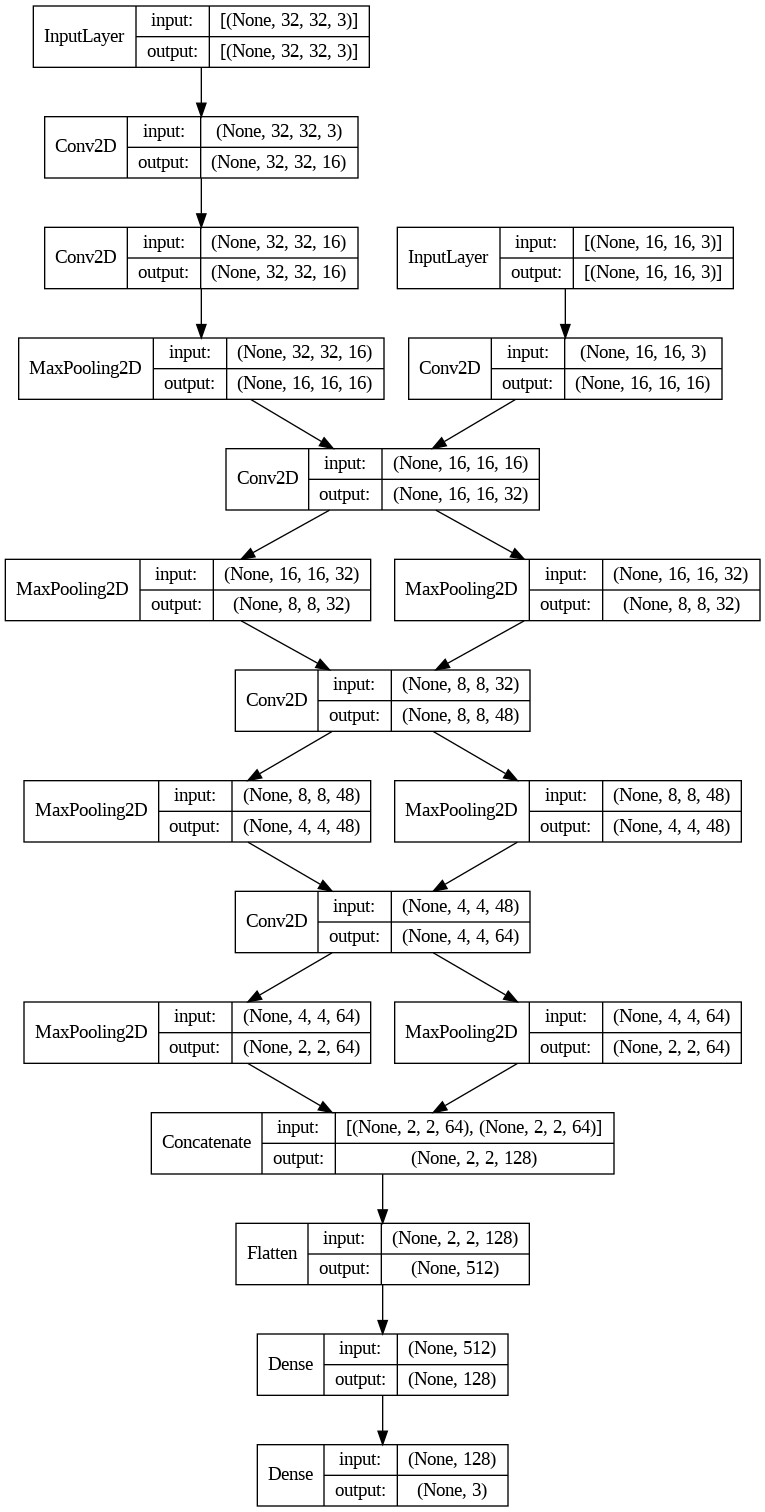

In [5]:
plot_model(modelDualTw,
           to_file='DualTw_model.png',
           show_shapes=True,
           show_layer_names=False,
           rankdir='TB')